In [1]:
K_MAX = 128
R_MAX = 512
Z_MAX = 512
import itertools as it

%run GenerateParameters.ipynb

Generating cache table of size 512x512x128 (~25.0 bits)...


  0%|          | 0/511 [00:00<?, ?it/s]

Done. Table generation took 1.1 seconds


In [21]:
def get_block_dist(l, beta, g, alpha=0.5):
    block_dist = stats.geom(g).pmf(np.arange(Z_MAX))
    length_penalty = np.arange(Z_MAX) ** alpha
    length_penalty[0] = 1
    deletion_probability = np.exp(-l*np.arange(Z_MAX))
    deletion_penalty = np.exp(-beta*deletion_probability)

    block_dist = block_dist * deletion_penalty / length_penalty
    block_dist = (1 / np.sum(block_dist)) * block_dist
    return block_dist

In [27]:
l = 0.25
base_g = (1 - ((1 - 0.23) ** (l / 1.79)))
base_beta = 4

dist = get_block_dist(l, base_beta, base_g)

g_betas = list(it.product(
    np.linspace(0.7 * base_g, 0.75*base_g, 30), 
    np.linspace(3., 4., 10)
))

scores2 = {}

for g, beta in ntqdm.tqdm(g_betas):
    dist = get_block_dist(l, beta, g)
    rd = RunDistribution(dist, l)
    scores2[(g, beta)] = rd.compute_lower_bound() / l

  0%|          | 0/300 [00:00<?, ?it/s]

In [28]:
sorted(scores2.items(), key=lambda x: x[1], reverse=True)

[((0.0260805027964504, 3.4444444444444446), 0.1174955509330229),
 ((0.026142304935778484, 3.4444444444444446), 0.11749549457106813),
 ((0.02601870065712232, 3.4444444444444446), 0.11749518751904325),
 ((0.026204107075106564, 3.4444444444444446), 0.11749502099784477),
 ((0.026204107075106564, 3.5555555555555554), 0.1174950179744695),
 ((0.026142304935778484, 3.5555555555555554), 0.11749483638459934),
 ((0.026265909214434648, 3.5555555555555554), 0.11749478773812211),
 ((0.025956898517794237, 3.4444444444444446), 0.11749440173544186),
 ((0.0260805027964504, 3.5555555555555554), 0.11749424044798219),
 ((0.026327711353762728, 3.5555555555555554), 0.11749414816828599),
 ((0.026265909214434648, 3.4444444444444446), 0.11749413274956384),
 ((0.02601870065712232, 3.5555555555555554), 0.11749322761580394),
 ((0.025895096378466157, 3.4444444444444446), 0.11749319095917977),
 ((0.026389513493090808, 3.5555555555555554), 0.11749310173048187),
 ((0.026327711353762728, 3.4444444444444446), 0.11749283

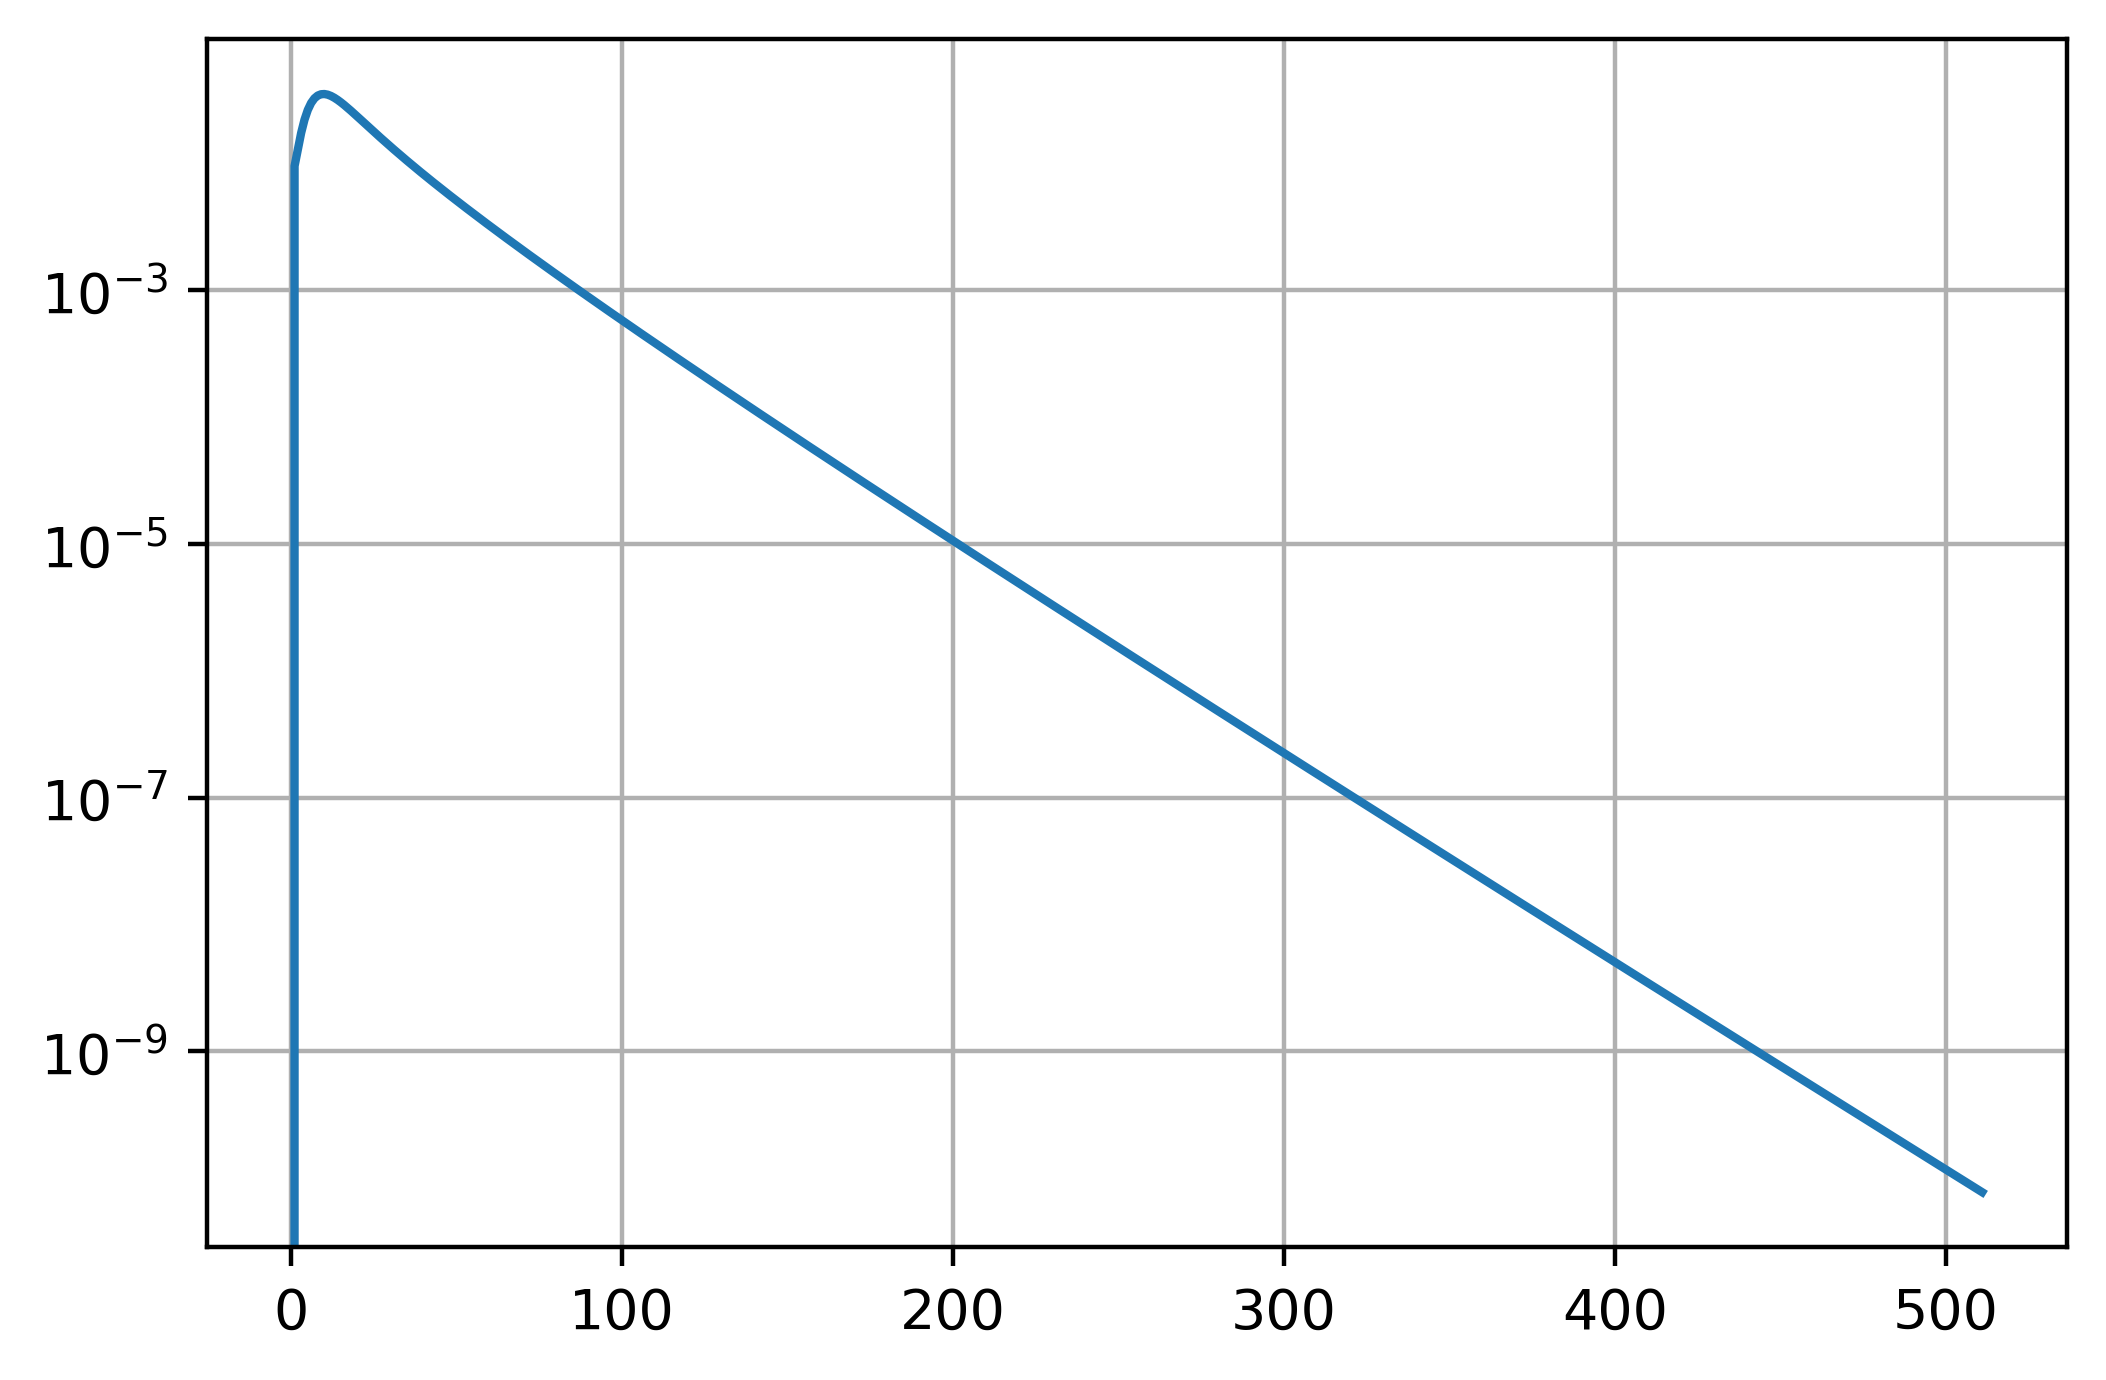

In [4]:
f = plt.figure(dpi=400)
plt.plot(dist)
plt.yscale('log')
plt.grid()